[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aprendizaje-automatico-dc-uba-ar/material/blob/main/notebooks/notebook_07_ingenieria_atributos_clase-published.ipynb)

# Ingeniería de Atributos

In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def cargar_datos():
    df = pd.read_csv('https://github.com/aprendizaje-automatico-dc-uba-ar/material/raw/main/notebooks/data_02_titanic.csv')
    X = df.drop("Survived", axis=1)
    y = df.Survived
    return X, y

X, y = cargar_datos()


X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [2]:
X.Ticket.head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

Pausa

In [3]:
print(f"El dataset es de {X.shape[0]} observaciones pero si miro hay sólo {X['Ticket'].nunique()} Tickets únicos")


El dataset es de 891 observaciones pero si miro hay sólo 681 Tickets únicos


Pausa

In [4]:
cond = X.groupby(["Ticket"]).count()["PassengerId"]>1
cond

X[X['Ticket'].map(cond)].sort_values(["Ticket"])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
257,258,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.500,B77,S
759,760,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.500,B77,S
504,505,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.500,B79,S
262,263,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.650,E67,S
558,559,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.650,E67,S
...,...,...,...,...,...,...,...,...,...,...,...
736,737,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.375,NaN,S
86,87,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.375,NaN,S
147,148,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.375,NaN,S
540,541,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.000,B22,S


In [6]:
X_objs = X.select_dtypes(include=[object])
X_objs.head(3)

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S


In [14]:
sum(X.Sex=="female")
sum(X.Sex!="female")

577

Pausa

In [11]:
from sklearn.tree import DecisionTreeClassifier
import random

In [12]:
random.seed(1234)

cols = ['Sex', 'Age']
arbol = DecisionTreeClassifier()
try:
    arbol.fit(X[cols], y)
    print(arbol.score(X[cols], y))
except Exception as e:
    print(f"Ocurrió una excepción: \n\t{e}")

Ocurrió una excepción: 
	could not convert string to float: 'male'


Pausa

# Conversión de variables


In [16]:
from sklearn.preprocessing import OneHotEncoder

random.seed(1234)

cols = ['Sex']

encode_sex = OneHotEncoder(sparse_output=False)
transformed_sex = encode_sex.fit_transform(X[cols])
print(transformed_sex)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


Pausa

In [17]:
random.seed(1234)

cols = ['Sex']

encode_sex = OneHotEncoder(sparse_output=False, drop="first")
encode_sex.fit(X[cols])
transformed_sex = encode_sex.transform(X[cols])
print(transformed_sex)

[[1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.

Pausa

In [18]:
random.seed(1234)

cols = ["dummy_sex_var", 'Age'] #'Sex',
X_temp = X.copy()
X_temp["dummy_sex_var"] = encode_sex.transform(X[["Sex"]])

display(X_temp)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,dummy_sex_var
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1.0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1.0


In [19]:
arbol = DecisionTreeClassifier()
try:
    arbol.fit(X_temp[cols], y)
    print(arbol.score(X_temp[cols], y))
except Exception as e:
    print(f"Ocurrió una excepción: \n\t{e}")

Ocurrió una excepción: 
	Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [ ]:
X

Pausa

Text(0.5, 1.0, 'Missing values heatmap')

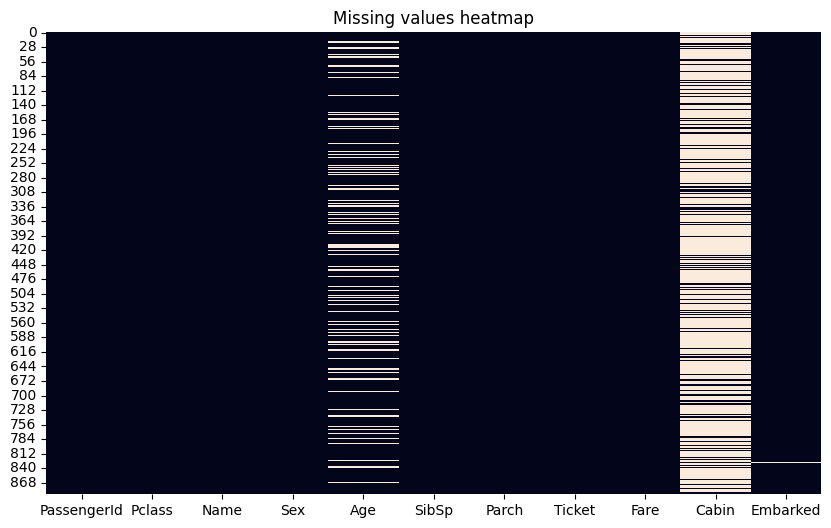

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(X.isnull(), cbar = False).set_title("Missing values heatmap")

Pausa

In [21]:
print(f'Niños {sum(X.Age <= 6)} + Not Niños {sum(X.Age > 6)} = {sum(X.Age <= 6) + sum(X.Age > 6)}')

Niños 47 + Not Niños 667 = 714


Pausa

714/891 son valores no nulos (177 son nulos)


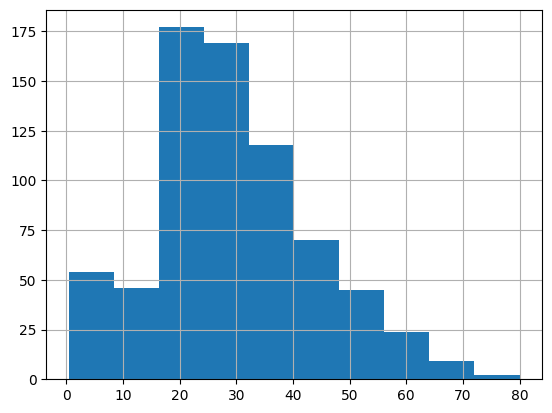

In [22]:
X.Age.hist(color="tab:blue")
print(f"{X.Age.count()}/{X.shape[0]} son valores no nulos ({X.Age.isna().sum()} son nulos)")

Pausa


In [23]:
from sklearn.impute import SimpleImputer
cols = ['Age']

imputer_age_1 = SimpleImputer(strategy="median")
imputer_age_1.fit(X[cols])
res = imputer_age_1.transform(X[cols])
res

array([[22.  ],
       [38.  ],
       [26.  ],
       [35.  ],
       [35.  ],
       [28.  ],
       [54.  ],
       [ 2.  ],
       [27.  ],
       [14.  ],
       [ 4.  ],
       [58.  ],
       [20.  ],
       [39.  ],
       [14.  ],
       [55.  ],
       [ 2.  ],
       [28.  ],
       [31.  ],
       [28.  ],
       [35.  ],
       [34.  ],
       [15.  ],
       [28.  ],
       [ 8.  ],
       [38.  ],
       [28.  ],
       [19.  ],
       [28.  ],
       [28.  ],
       [40.  ],
       [28.  ],
       [28.  ],
       [66.  ],
       [28.  ],
       [42.  ],
       [28.  ],
       [21.  ],
       [18.  ],
       [14.  ],
       [40.  ],
       [27.  ],
       [28.  ],
       [ 3.  ],
       [19.  ],
       [28.  ],
       [28.  ],
       [28.  ],
       [28.  ],
       [18.  ],
       [ 7.  ],
       [21.  ],
       [49.  ],
       [29.  ],
       [65.  ],
       [28.  ],
       [21.  ],
       [28.5 ],
       [ 5.  ],
       [11.  ],
       [22.  ],
       [38.  ],
       [

Pausa

<Axes: >

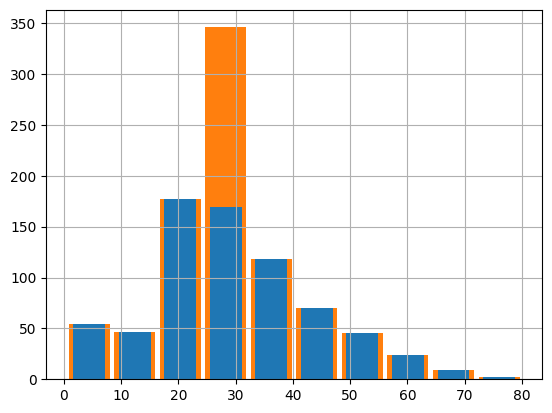

In [24]:
plt.hist(res, rwidth=0.9,alpha=1, color="tab:orange")
X["Age"].hist(rwidth=0.7,alpha=1, color="tab:blue")



Pausa

In [25]:
from sklearn.impute import SimpleImputer

cols = ['Age']
group_cols = ["Sex", "Pclass"]
imputer_age_2 = SimpleImputer(strategy="median")

grouped = X.groupby(group_cols)

res = grouped[cols].transform(lambda x: imputer_age_2.fit_transform(x.values.reshape(-1,1)).flatten())

<Axes: >

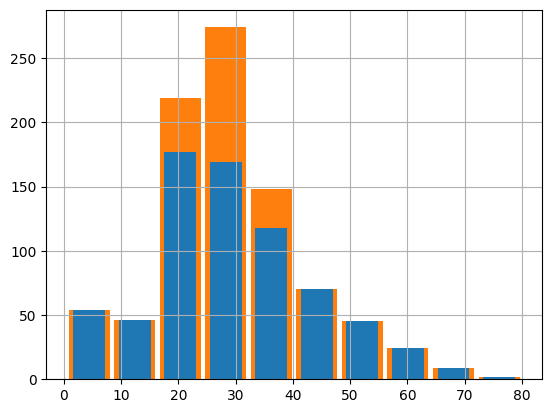

In [26]:
plt.hist(res, rwidth=0.9,alpha=1, color="tab:orange")
X["Age"].hist(rwidth=0.7,alpha=1, color="tab:blue")

Pausa

# Transformaciones

- Cherbourg 49.6339° N, 1.6222° W
- Queenstown 53.8258° N, 3.0322° W
- Southampton 50.9105° N, 1.4049° W

**Hundimiento**: 41°43′32″N 49°56′49″W


<Axes: >

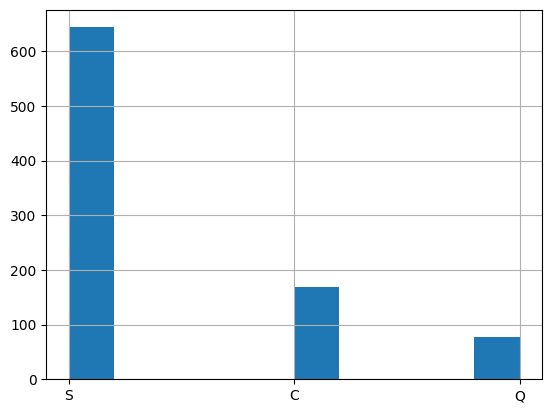

In [27]:
X['Embarked'].hist()

In [28]:
import geopy.distance

harbours = pd.DataFrame({
    "Letter": ["C", "Q", "S"],
    'Harbour': ['Cherbourg', 'Queenstown', 'Southampton', ],
    'Lat': [49.6339, 53.8258, 50.9105],
    'Lon': [-1.6222, -3.0322, -1.4049]
})

sink_coord = (41.7256, -49.9472)

harbours['dist'] = harbours.apply(lambda row : round(geopy.distance.geodesic(
                    (row["Lat"], row["Lon"]), sink_coord).km), axis=1)

distancias = dict(zip(harbours['Letter'], harbours['dist']))


Pausa

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin

class HarbourTransform(BaseEstimator, TransformerMixin):
    def __init__(self, mapping_dict):
        self.mapping_dict = mapping_dict
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        encoded = np.array([self.mapping_dict.get(c[0], np.nan) for c in X.values])
        return encoded
    
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X, y)

In [30]:
cols = ["Embarked"]
distEncoder = HarbourTransform(distancias)

res = distEncoder.fit_transform(X[cols])

np.unique(res,return_counts=True)


(array([3685., 3797., 3801.,   nan]), array([ 77, 168, 644,   2]))

## Selección de variables

In [31]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('encode', OneHotEncoder(drop="first"), ['Sex', "Embarked"]),
                         ('imputer', SimpleImputer(strategy="mean"), ["Age"])
                        ],
                    #    remainder='drop', verbose_feature_names_out=False)      
                       remainder='passthrough', verbose_feature_names_out=True)      
X_rfecv = pd.DataFrame(ct.fit_transform(X), columns = ct.get_feature_names_out())

X_rfecv = X_rfecv[['encode__Sex_male', 'encode__Embarked_Q', 'encode__Embarked_S',
       'encode__Embarked_nan', 'imputer__Age', 'remainder__PassengerId',
       'remainder__Pclass', #'remainder__Name', 
       'remainder__SibSp',
       'remainder__Parch', #'remainder__Ticket', 
       'remainder__Fare', #'remainder__Cabin'
       ]]

In [32]:

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

min_features_to_select = 1  # Minimum number of features to consider
clf = DecisionTreeClassifier(max_depth=5)
cv = StratifiedKFold(5)


rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X_rfecv, y)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 4


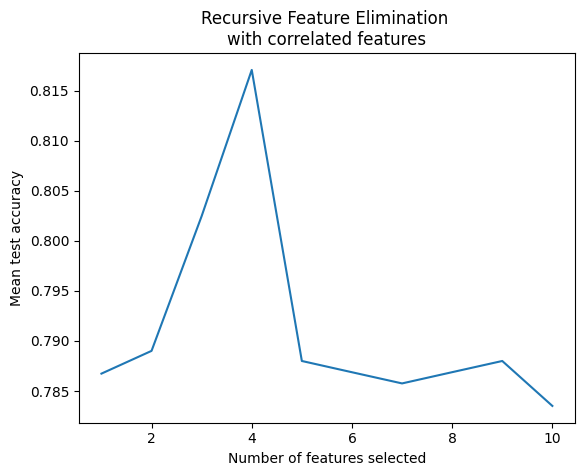

In [33]:
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

## Pipeline

In [34]:
class FeatureProjection(BaseEstimator, TransformerMixin):
    """
    Recibe una lista de campos a proyectar, y los proyecta como listas
    """

    def __init__(self, fields, as_dict=False):
        self.fields = fields
        self.as_dict = as_dict

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        res = []
        for i, doc in enumerate(X):
            if self.as_dict:
                row = {field: doc[field] for field in self.fields}
            else:
                row = [doc[field] for field in self.fields]
            res.append(row)
        return res


In [35]:
feat_proj = FeatureProjection(['PassengerId', 'Pclass', 'Name', 'SibSp', 'Parch',
       'Ticket', 'Fare'])
r=feat_proj.fit_transform(X.to_dict('records'),y)

In [36]:
from sklearn.pipeline import make_pipeline, make_union
from sklearn.ensemble import RandomForestClassifier

features_pipe =  make_union(
    make_pipeline(
        FeatureProjection(['Pclass', 'SibSp', 'Parch',  'Fare'])
    ),
    make_pipeline(
        FeatureProjection(['Age']),
        SimpleImputer(strategy="median")
    ),
    make_pipeline(
        FeatureProjection(['Sex']),
        OneHotEncoder(sparse_output=False, drop='first')
    ),
)

dt_pipe = make_pipeline(
    features_pipe,
    DecisionTreeClassifier(max_depth=10)
)

rf_pipe = make_pipeline(
    features_pipe,
    RandomForestClassifier(max_depth=10, n_estimators=100)
)

Pausa

In [37]:
import sklearn.model_selection

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
                    X , y, random_state=4, test_size=0.1)

random.seed(38)
dt_pipe.fit(X_train.to_dict("records"), y_train)
# dt_pipe.predict(X_train.to_dict("records"))
dt_score = dt_pipe.score(X_test.to_dict("records"), y_test)

random.seed(38)
rf_pipe.fit(X_train.to_dict("records"), y_train)
rf_score = rf_pipe.score(X_test.to_dict("records"), y_test)

print(f"Obtuve {round(dt_score,3)} para un árbol, y {round(rf_score,3)} para RandomForest")

Obtuve 0.822 para un árbol, y 0.889 para RandomForest
